In [ ]:
import os
import cv2

data = []
labels = []

dataset_path = "train"

valid_ext = [".jpg", ".jpeg", ".png", ".bmp"]

for img_name in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_name)

    if not any(img_name.lower().endswith(ext) for ext in valid_ext):
        print("Skipping:", img_name)
        continue

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Cannot read:", img_path)
        continue

    img = cv2.resize(img, (128, 128))

    data.append(img)


    label = img_name.split("_")[0]
    labels.append(label)

print("Total images loaded:", len(data))
print("Total labels loaded:", len(labels))
print("Sample label:", labels[0])

Skipping: recycle.ipynb
Total images loaded: 2571
Total labels loaded: 2571
Sample label: cardboard101


In [18]:
print(type(data[0]))
print(data[0].shape)

<class 'numpy.ndarray'>
(128, 128)


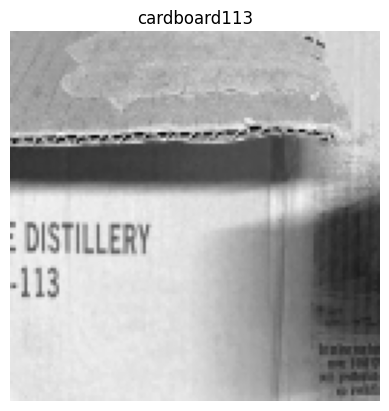

In [17]:
import matplotlib.pyplot as plt

plt.imshow(data[10], cmap='gray')
plt.title(labels[10])
plt.axis('off')
plt.show()

In [20]:
from skimage.feature import hog
hog_features = []

for img in data:
    fd = hog(img,
             orientations=9,
             pixels_per_cell=(8, 8),
             cells_per_block=(2, 2),
             block_norm='L2-Hys')
    hog_features.append(fd)


In [21]:
import numpy as np

X = np.array(hog_features)
y = np.array(labels)

In [22]:
print("Feature vector shape:", X.shape)
print("Number of samples:", len(X))

Feature vector shape: (2571, 8100)
Number of samples: 2571


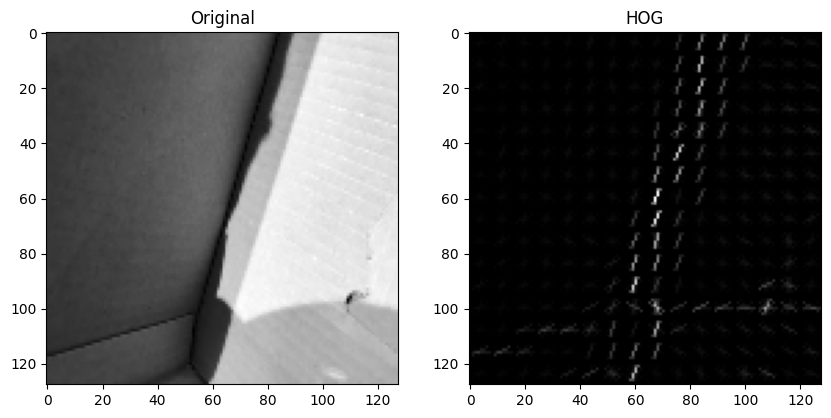

In [23]:
from skimage import exposure
import matplotlib.pyplot as plt

img = data[0]

fd, hog_image = hog(img,
                    orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    block_norm='L2-Hys',
                    visualize=True)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG")
plt.show()